In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_excel('Kompetitorv1.xlsx', 'PTO', usecols=['No', 'Sum_Of_Net_Weight_Kg'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   No                    575 non-null    datetime64[ns]
 1   Sum_Of_Net_Weight_Kg  575 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [4]:
df['Sale_LastMonth']=df['Sum_Of_Net_Weight_Kg'].shift(+1)
df['Sale_2Monthsback']=df['Sum_Of_Net_Weight_Kg'].shift(+2)
df['Sale_3Monthsback']=df['Sum_Of_Net_Weight_Kg'].shift(+3)
df

,No,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
0,2020-09-04 08:00:00,1260.0,NaN,NaN,NaN
1,2020-09-07 08:00:00,2000.0,1260.0,NaN,NaN
2,2020-09-07 08:00:00,600.0,2000.0,1260.0,NaN
3,2020-09-07 08:00:00,200.0,600.0,2000.0,1260.0
4,2020-09-12 08:00:00,1000.0,200.0,600.0,2000.0
...,...,...,...,...,...
570,2022-02-11 08:00:00,2400.0,8000.0,3000.0,3000.0
571,2022-02-21 08:00:00,6000.0,2400.0,8000.0,3000.0
572,2022-02-22 08:00:00,600.0,6000.0,2400.0,8000.0
573,2022-02-24 08:00:00,1000.0,600.0,6000.0,2400.0


In [5]:
df=df.dropna()
df

,No,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
3,2020-09-07 08:00:00,200.0,600.0,2000.0,1260.0
4,2020-09-12 08:00:00,1000.0,200.0,600.0,2000.0
5,2020-09-15 08:00:00,4000.0,1000.0,200.0,600.0
6,2020-09-18 08:00:00,2000.0,4000.0,1000.0,200.0
7,2020-09-18 08:00:00,2000.0,2000.0,4000.0,1000.0
...,...,...,...,...,...
570,2022-02-11 08:00:00,2400.0,8000.0,3000.0,3000.0
571,2022-02-21 08:00:00,6000.0,2400.0,8000.0,3000.0
572,2022-02-22 08:00:00,600.0,6000.0,2400.0,8000.0
573,2022-02-24 08:00:00,1000.0,600.0,6000.0,2400.0


In [6]:
df.describe()

,Sum_Of_Net_Weight_Kg,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
count,572.000000,572.000000,572.000000,572.000000
mean,2699.544143,2687.481206,2689.229458,2690.383304
std,3019.837026,3014.404071,3013.713580,3013.038555
min,28.000000,28.000000,28.000000,28.000000
25%,800.000000,800.000000,800.000000,800.000000
50%,1800.000000,1800.000000,1800.000000,1800.000000
75%,3425.000000,3400.000000,3400.000000,3400.000000
max,16000.000000,16000.000000,16000.000000,16000.000000


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sum_Of_Net_Weight_Kg']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 600. 2000. 1260.]
 [ 200.  600. 2000.]
 [1000.  200.  600.]
 ...
 [6000. 2400. 8000.]
 [ 600. 6000. 2400.]
 [1000.  600. 6000.]]


In [10]:
# Prediksi Untuk 3 Bulan Kedepan
X_train,X_test,y_train,y_test=final_x[:-3],final_x[-3:],y[:-3],y[-3:]

In [11]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

E:\Users\BAGJA\AppData\Local\Temp\ipykernel_3420\1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

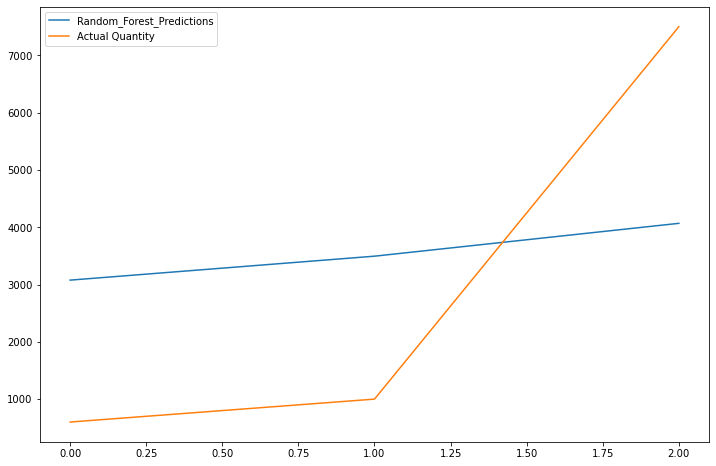

[3076.7  3494.75 4067.9 ]


10639.35

In [12]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Quantity') 
plt.legend(loc="upper left")
plt.show()
print(pred)
pred.sum()

In [13]:
# PT.SIL Menguasai Pasar Sebesar 1,45%
10639.35*0.0145

154.270575

In [14]:
# Hasil kali penguasaan pasar dibagi menjadi jumlah target prediksi
154.270575/3

51.423525000000005

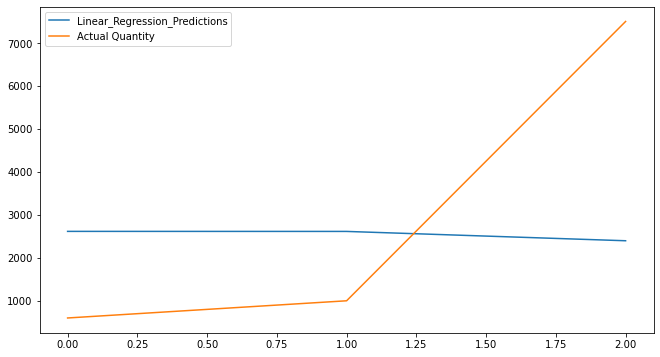

[[2615.26985126]
 [2614.10652934]
 [2397.00586443]]


7626.382245031493

In [15]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()
print(lin_pred)
lin_pred.sum()

In [16]:
# PT.SIL Menguasai Pasar Sebesar 1,45%
7626.382245031493*0.0145

110.58254255295665

In [17]:
# Hasil kali penguasaan pasar dibagi menjadi jumlah target prediksi
110.58254255295665/3

36.86084751765222

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [19]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 2836.496128588932
Mean Squared Error for Linear Regression Model is: 3301.8783345798693
